In [8]:
import pandas as pd
import numpy as np

In [9]:
#reading 2020 Jan week1 data
df_jan2020 = pd.read_csv('195JourneyDataExtract01Jan2020-07Jan2020.csv')

In [12]:
df_jan2020

Rental Id  Duration  Bike Id          End Date  EndStation Id  \
0        94113398       960     6800  07/01/2020 14:07            541   
1        94117049       600     8691  07/01/2020 17:06             48   
2        94110497       540      531  07/01/2020 11:01            654   
3        94050449       600     8150  04/01/2020 12:27            685   
4        94019122      1140    15515  02/01/2020 16:31            676   
...           ...       ...      ...               ...            ...   
126796   94067445       360    14461  05/01/2020 13:25            183   
126797   94105080      1260    16363  07/01/2020 08:50            129   
126798   94056128       780     3351  04/01/2020 16:11            376   
126799   94115074       420    16831  07/01/2020 15:40            695   
126800   94068357       180    12421  05/01/2020 14:04            439   

                     EndStation Name        Start Date  StartStation Id  \
0        Green Park Station, Mayfair  07/01/2020 13:51              164   
1        Godliman Street, St. Paul's  07/01/2020 16:56              323   
2               Ashmole Estate, Oval  07/01/2020 10:52              624   
3            Osiers Road, Wandsworth  04/01/2020 12:17              774   
4         Hartington Road, Stockwell  02/01/2020 16:12               83   
...                              ...               ...              ...   
126796   Riverlight North, Nine Elms  05/01/2020 13:19              800   
126797           Golden Square, Soho  07/01/2020 08:29              804   
126798       Millbank Tower, Pimlico  04/01/2020 15:58              800   
126799        Islington Green, Angel  07/01/2020 15:33              804   
126800  Killick Street, King's Cross  05/01/2020 14:01              804   

                      StartStation Name  
0          Cleveland Gardens, Bayswater  
1            Clifton Street, Shoreditch  
2       Courland Grove, Wandsworth Road  
3        Hurlingham Park, Parsons Green  
4               Panton Street, West End  
...                                 ...  
126796      Sopwith Way, Battersea Park  
126797         Good's Way, King's Cross  
126798      Sopwith Way, Battersea Park  
126799         Good's Way, King's Cross  
126800         Good's Way, King's Cross  

[126801 rows x 9 columns]

In [49]:
#df_jan2020["Ended Journeys"]

In [63]:
# New DataFrame from extracted Start Station Data from original data Set
startedJourneys = pd.DataFrame(df_jan2020[["StartStation Id", "StartStation Name", "Start Date"]])

In [64]:
#sort the bike rides in chronological order for the first week of January
startedJourneys["Start Date"] = pd.to_datetime(startedJourneys["Start Date"], format='%d/%m/%Y %H:%M')
startedJourneys.sort_values(by= "Start Date", inplace=True)
startedJourneys

StartStation Id                     StartStation Name  \
64544              360             Howick Place, Westminster   
23945              320  Queen Mother Sports Centre, Victoria   
95091              579                  Queen Street 2, Bank   
96847              254                Chadwell Street, Angel   
4204               727                Chesilton Road, Fulham   
...                ...                                   ...   
27700              690              Stanley Grove, Battersea   
33391              533         Wellington Row, Bethnal Green   
13964              357             Howland Street, Fitzrovia   
74472              522                Clinton Road, Mile End   
11517               14        Belgrove Street , King's Cross   

               Start Date  
64544 2020-01-01 00:00:00  
23945 2020-01-01 00:00:00  
95091 2020-01-01 00:00:00  
96847 2020-01-01 00:00:00  
4204  2020-01-01 00:01:00  
...                   ...  
27700 2020-01-07 23:50:00  
33391 2020-01-07 23:52:00  
13964 2020-01-07 23:53:00  
74472 2020-01-07 23:53:00  
11517 2020-01-07 23:53:00  

[126801 rows x 3 columns]

In [65]:
# Count Number of Times a station has a journey Started there
startedJourneys[["StartStation Id", "StartStation Name"]].value_counts()

StartStation Id  StartStation Name               
14               Belgrove Street , King's Cross      987
374              Waterloo Station 1, Waterloo        967
191              Hyde Park Corner, Hyde Park         824
154              Waterloo Station 3, Waterloo        707
303              Albert Gate, Hyde Park              674
                                                    ... 
608              Colet Gardens, Hammersmith           17
744              Ingrave Street, Clapham Junction     17
519              Teviot Street, Poplar                15
504              St. John's Park, Cubitt Town          7
494              South Quay East, Canary Wharf         7
Length: 787, dtype: int64

In [ ]:
startedJourneys.pivot(index="Start", cou)

In [76]:
stationWeeklyDemandStart = pd.DataFrame(df_jan2020[["StartStation Id", "StartStation Name"]].value_counts())
stationWeeklyDemandStart.columns = ["Total Num of Journeys that Start at Station"]
stationWeeklyDemandStart

Total Num of Journeys that Start at Station
StartStation Id StartStation Name                                                            
14              Belgrove Street , King's Cross                                            987
374             Waterloo Station 1, Waterloo                                              967
191             Hyde Park Corner, Hyde Park                                               824
154             Waterloo Station 3, Waterloo                                              707
303             Albert Gate, Hyde Park                                                    674
...                                                                                       ...
608             Colet Gardens, Hammersmith                                                 17
744             Ingrave Street, Clapham Junction                                           17
519             Teviot Street, Poplar                                                      15
504             St. John's Park, Cubitt Town                                                7
494             South Quay East, Canary Wharf                                               7

[787 rows x 1 columns]

In [79]:
stationWeeklyDemandEnd = pd.DataFrame(df_jan2020[["EndStation Id", "EndStation Name"]].value_counts())
stationWeeklyDemandEnd.columns = ["Total Num of Journeys that End Station"]
stationWeeklyDemandEnd.tail()

Total Num of Journeys that End Station
EndStation Id EndStation Name                                                       
14            Belgrove Street , King's Cross                                     962
374           Waterloo Station 1, Waterloo                                       937
191           Hyde Park Corner, Hyde Park                                        821
194           Hop Exchange, The Borough                                          733
303           Albert Gate, Hyde Park                                             700

In [102]:
# Concatenate Columns from total number borrow and return requests
StationDemand = pd.concat([stationWeeklyDemandStart, stationWeeklyDemandEnd], axis=1, names=["Station Id", "Station Name"])
#StationDemand.columns = ["Station Id", "Station Name"]
StationDemand

Total Num of Journeys that Start at Station  \
14  Belgrove Street , King's Cross                                            987   
374 Waterloo Station 1, Waterloo                                              967   
191 Hyde Park Corner, Hyde Park                                               824   
154 Waterloo Station 3, Waterloo                                              707   
303 Albert Gate, Hyde Park                                                    674   
...                                                                           ...   
608 Colet Gardens, Hammersmith                                                 17   
744 Ingrave Street, Clapham Junction                                           17   
519 Teviot Street, Poplar                                                      15   
504 St. John's Park, Cubitt Town                                                7   
494 South Quay East, Canary Wharf                                               7   

                                      Total Num of Journeys that End Station  
14  Belgrove Street , King's Cross                                       962  
374 Waterloo Station 1, Waterloo                                         937  
191 Hyde Park Corner, Hyde Park                                          821  
154 Waterloo Station 3, Waterloo                                         637  
303 Albert Gate, Hyde Park                                               700  
...                                                                      ...  
608 Colet Gardens, Hammersmith                                            17  
744 Ingrave Street, Clapham Junction                                      35  
519 Teviot Street, Poplar                                                  8  
504 St. John's Park, Cubitt Town                                          14  
494 South Quay East, Canary Wharf                                          6  

[787 rows x 2 columns]

In [104]:
StationDemand["Total Demand"]= StationDemand["Total Num of Journeys that Start at Station"]+ StationDemand["Total Num of Journeys that End Station"]
StationDemand

Total Num of Journeys that Start at Station  \
14  Belgrove Street , King's Cross                                            987   
374 Waterloo Station 1, Waterloo                                              967   
191 Hyde Park Corner, Hyde Park                                               824   
154 Waterloo Station 3, Waterloo                                              707   
303 Albert Gate, Hyde Park                                                    674   
...                                                                           ...   
608 Colet Gardens, Hammersmith                                                 17   
744 Ingrave Street, Clapham Junction                                           17   
519 Teviot Street, Poplar                                                      15   
504 St. John's Park, Cubitt Town                                                7   
494 South Quay East, Canary Wharf                                               7   

                                      Total Num of Journeys that End Station  \
14  Belgrove Street , King's Cross                                       962   
374 Waterloo Station 1, Waterloo                                         937   
191 Hyde Park Corner, Hyde Park                                          821   
154 Waterloo Station 3, Waterloo                                         637   
303 Albert Gate, Hyde Park                                               700   
...                                                                      ...   
608 Colet Gardens, Hammersmith                                            17   
744 Ingrave Street, Clapham Junction                                      35   
519 Teviot Street, Poplar                                                  8   
504 St. John's Park, Cubitt Town                                          14   
494 South Quay East, Canary Wharf                                          6   

                                      Total Demand  
14  Belgrove Street , King's Cross            1949  
374 Waterloo Station 1, Waterloo              1904  
191 Hyde Park Corner, Hyde Park               1645  
154 Waterloo Station 3, Waterloo              1344  
303 Albert Gate, Hyde Park                    1374  
...                                            ...  
608 Colet Gardens, Hammersmith                  34  
744 Ingrave Street, Clapham Junction            52  
519 Teviot Street, Poplar                       23  
504 St. John's Park, Cubitt Town                21  
494 South Quay East, Canary Wharf               13  

[787 rows x 3 columns]

In [21]:
#stationWeeklyDemandEnd.pivot(index="", cou)

pandas.core.series.Series

<AxesSubplot:xlabel='EndStation Id,EndStation Name', ylabel='demand'>

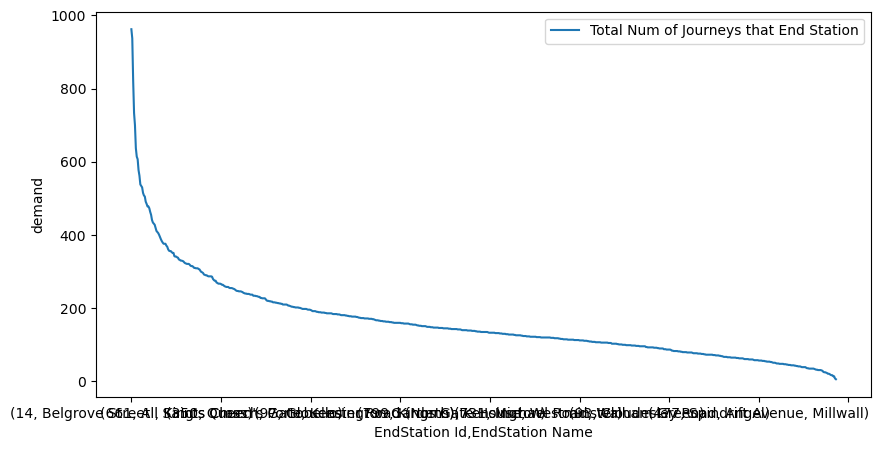

In [68]:
stationWeeklyDemandEnd.plot(kind="line", figsize=(10,5), ylabel="demand")

## Demand vs Station

<AxesSubplot:xlabel='Station ID & Name', ylabel='Demand'>

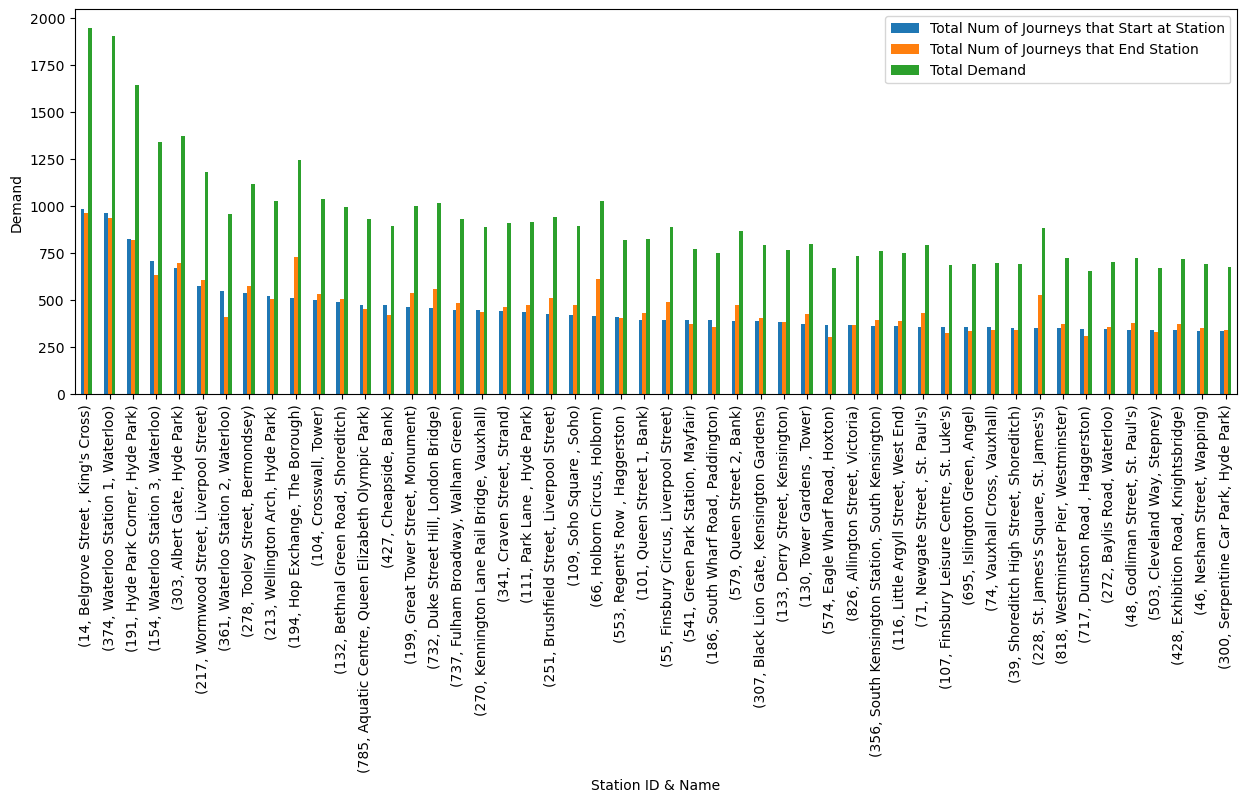

In [108]:
# Top 50 stations with highest weekly Demand (total successful borrow and return requests) 
StationDemand.head(50).plot(kind="bar", figsize=(15,5), ylabel="Demand", xlabel="Station ID & Name")

## Demand vs Time

### Columns = first 7 days, lines should be stations, y axis should be demand

In [171]:
#demandByTime
date = ["2020-01-01","2020-01-02","2020-01-03","2020-01-04","2020-01-05","2020-01-06","2020-01-07"]

# create a new column that separeates data per day and counts how many bike borrow requests per station
startedJourneys["Day/Month"] = startedJourneys["Start Date"].apply(lambda x: "%d/%d %a" % (x.day, x.month, x.day_name()))
counterDailyJourneyStarts = startedJourneys.groupby(["Day/Month", "StartStation Name"], as_index=False).size()
counterDailyJourneyStarts.sort_values(by="Day/Month")
#counterDailyJourneyStarts= pd.DataFrame(counterDailyJourneyStarts)
#counterDailyJourneyStarts.reset
#counterDailyJourneyStarts= counterDailyJourneyStarts.rename(columns={"Day/Month": "Day/Month", "StartStation Name": "StartStation Name", "0":"Daily Borrowed"})
counterDailyJourneyStarts

Day/Month                  StartStation Name  size
0     1/1 'Wednesday'  Abbey Orchard Street, Westminster    58
1     1/1 'Wednesday'      Abbotsbury Road, Holland Park     4
2     1/1 'Wednesday'    Aberdeen Place, St. John's Wood     7
3     1/1 'Wednesday'           Aberfeldy Street, Poplar     8
4     1/1 'Wednesday'        Abingdon Green, Westminster    41
...               ...                                ...   ...
5464    7/1 'Tuesday'               Wren Street, Holborn    63
5465    7/1 'Tuesday'          Wright's Lane, Kensington    38
5466    7/1 'Tuesday'              Wynne Road, Stockwell    17
5467    7/1 'Tuesday'           York Hall, Bethnal Green    39
5468    7/1 'Tuesday'              York Way, Kings Cross    28

[5469 rows x 3 columns]

<AxesSubplot:xlabel='Day/Month,StartStation Name', ylabel='demand'>

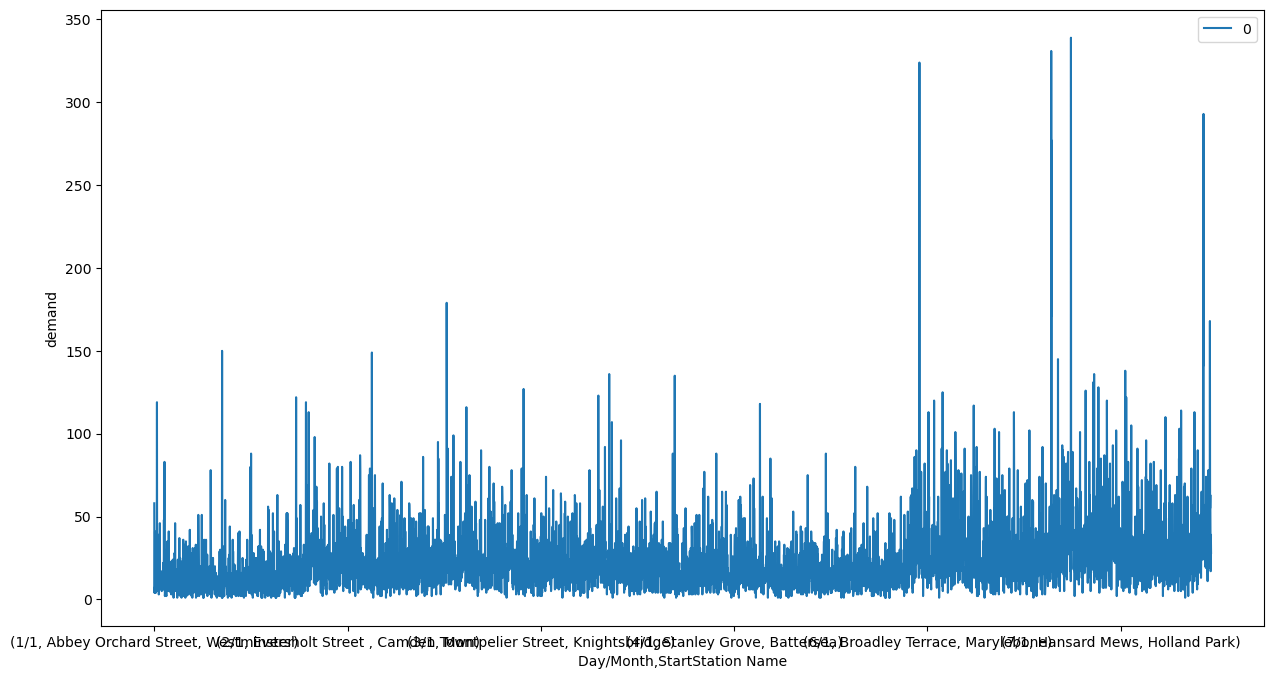

In [130]:
counterDailyJourneyStarts.plot(kind="line", figsize=(15,8), ylabel="demand")

<AxesSubplot:xlabel='Day/Month', ylabel='Demand'>

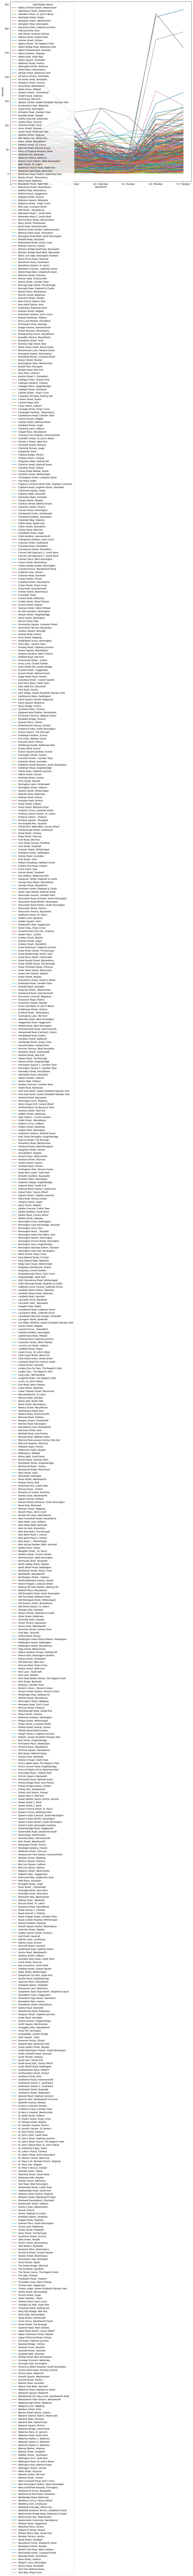

In [172]:
startPivot = counterDailyJourneyStarts.pivot(index="Day/Month", columns="StartStation Name", values="size")
startPivot.plot(kind="line", figsize=(15,15), ylabel="Demand")